# **PPDai Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

ppdai_dataset_path = '../../datasets/PPDaiData/ppdaiData.csv'
ppdai_prep_dataset_path = '../../datasets/preprocessed/ppdai/'

(CVXPY) Mar 04 04:53:30 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Mar 04 04:53:30 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(ppdai_prep_dataset_path)

In [3]:
data = utilities.read_csv(ppdai_dataset_path, dtype={'label':bool})
data

,sex,occupation,education,marriage,household,income,outcome,income_tm,outcome_tm,tm_encode_3,...,cash_limit,repay_state,browse_data,loan_time,time,yu_e,yu_e_categery,yu_e_tm,yu_e_tm_categery,label
0,1,2,3,1,3,13.734079,13.255397,5.900126e+09,5.900935e+09,0.000000e+00,...,0.000000,0.0,0.0,5914855887,5.914856e+09,0.478681,1.0,-8.094010e+05,3.0,False
1,1,2,3,2,1,0.000000,0.000000,0.000000e+00,0.000000e+00,5.659685e+09,...,7.087560,0.0,151500.0,5914855887,2.551708e+08,0.000000,2.0,0.000000e+00,2.0,False
2,1,4,4,1,4,13.249264,9.834236,4.767557e+09,5.899778e+09,0.000000e+00,...,0.000000,0.0,38586.0,5914855887,5.914856e+09,3.415028,1.0,-1.132222e+09,3.0,False
3,1,4,4,3,2,12.128566,10.920132,5.042088e+09,5.902715e+09,5.912412e+09,...,7.808445,0.0,38764.0,5914855887,2.443522e+06,1.208435,1.0,-8.606264e+08,3.0,True
4,1,2,2,3,1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,19.971271,0.0,0.0,5914855887,5.914856e+09,0.000000,2.0,0.000000e+00,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,1,2,3,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.937622e+09,...,12.357302,0.0,46890.0,5932135887,-5.486400e+06,0.000000,2.0,0.000000e+00,2.0,False
55592,1,4,2,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.907957e+09,...,7.284420,0.0,19600.0,5932135887,2.417882e+07,0.000000,2.0,0.000000e+00,2.0,True
55593,1,2,4,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.918528e+09,...,8.948062,0.0,104040.0,5932135887,1.360766e+07,0.000000,2.0,0.000000e+00,2.0,False
55594,1,2,3,3,4,0.000000,0.000000,0.000000e+00,0.000000e+00,4.227085e+09,...,9.277013,0.0,70720.0,5932135887,1.705051e+09,0.000000,2.0,0.000000e+00,2.0,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55596 entries, 0 to 55595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  55596 non-null  int64  
 1   occupation           55596 non-null  int64  
 2   education            55596 non-null  int64  
 3   marriage             55596 non-null  int64  
 4   household            55596 non-null  int64  
 5   income               55596 non-null  float64
 6   outcome              55596 non-null  float64
 7   income_tm            55596 non-null  float64
 8   outcome_tm           55596 non-null  float64
 9   tm_encode_3          55596 non-null  float64
 10  prior_account        55596 non-null  float64
 11  prior_repay          55596 non-null  float64
 12  credit_limit         55596 non-null  float64
 13  account_balance      55596 non-null  float64
 14  minimun_repay        55596 non-null  float64
 15  consume_count        55596 non-null 

#### Fix column names formatting.

In [6]:
data.columns = data.columns.str.replace("_", "-")

#### Plot features data types.

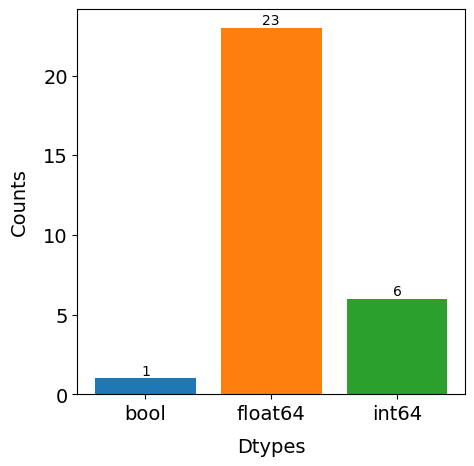

In [6]:
plotting.plot_dtypes_hist(data, '', 'Dtypes', 'Counts',
                          save_path=ppdai_prep_dataset_path + 'dtypes.pdf')

#### Data cleaning.

In [7]:
before_data_cleaning_count = len(data)

#### Rename features labels to have more meaningful names.

In [8]:
data.rename(columns={'label':'defaulted'}, inplace=True)

#### Plot class distribution.

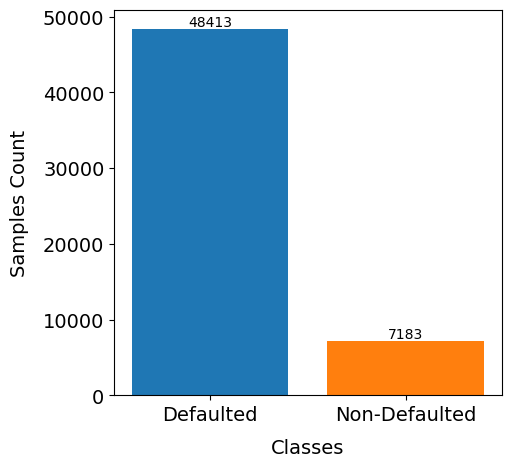

In [9]:
plotting.plot_hist(['Defaulted', 'Non-Defaulted'], data.defaulted.value_counts().values,
                   '', 'Classes', 'Samples Count',
                   save_path=ppdai_prep_dataset_path + 'class_distribution.pdf')

#### Plot missing values histogram.

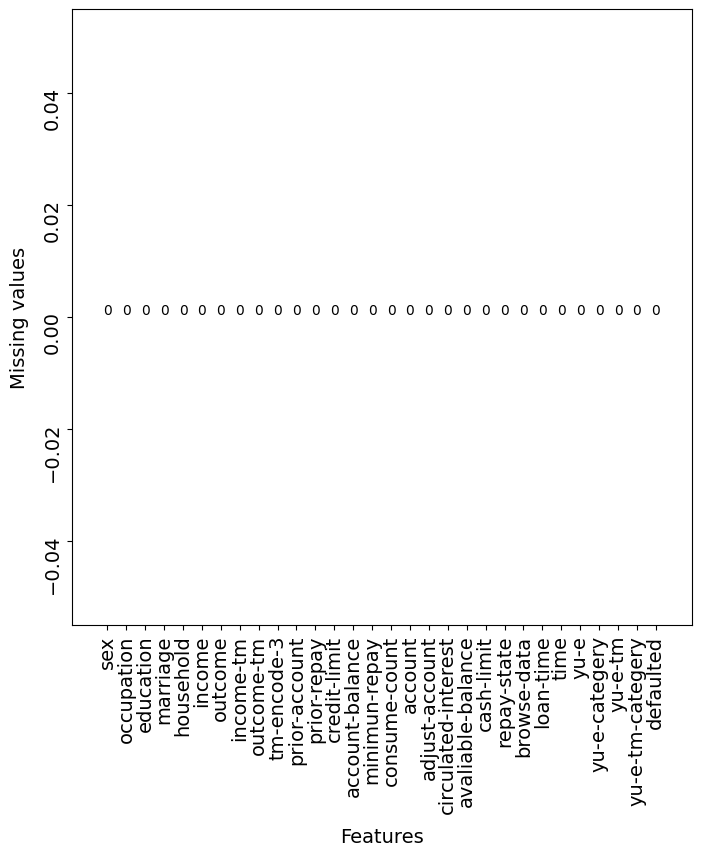

In [10]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(8,8),
                   rotated_ticks=True, save_path=ppdai_prep_dataset_path + 'missing_values-1.pdf')

#### Drop useless and ambiguous features.

In [11]:
data.drop(['loan-time'], axis=1, inplace=True)

#### Drop redundant features using IV score.
#### This was computed previously but getting rid of them a-priori helps next pre-processing steps.

In [12]:
data.drop(['income', 'income-tm', 'outcome', 'outcome-tm', 'adjust-account', 'account-balance', 'avaliable-balance', 'repay-state', 'yu-e', 'yu-e-tm'], axis=1, inplace=True)

#### Fix nominal features encoded as integers/floats.

In [13]:
data['sex'] = data['sex'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data['education'] = data['education'].astype('category')
data['marriage'] = data['marriage'].astype('category')
data['household'] = data['household'].astype('category')
data['yu-e-categery'] = data['yu-e-categery'].astype('category')
data['yu-e-tm-categery'] = data['yu-e-tm-categery'].astype('category')

#### Apply optimal binninf and WoE.

In [14]:
data, features_scores = preprocessing.opt_bin_woe(data=data, solver="cp",
                                                  outlier_detector="range",
                                                  save_path=ppdai_prep_dataset_path,
                                                  verbose=False)

  0%|                                                                                                                                                                 | 0/19 [00:00<?, ?it/s]

Processing feature: sex.
2023-03-04 14:22:38,369 | INFO : Optimal binning started.
2023-03-04 14:22:38,370 | INFO : Options: check parameters.
2023-03-04 14:22:38,371 | INFO : Pre-processing started.
2023-03-04 14:22:38,371 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:38,374 | INFO : Pre-processing: number of clean samples: 55596
2023-03-04 14:22:38,375 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:38,375 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:38,376 | INFO : Pre-processing: number of outlier samples: 0
2023-03-04 14:22:38,376 | INFO : Pre-processing: number of others samples: 0
2023-03-04 14:22:38,377 | INFO : Pre-processing: number of categories: 3
2023-03-04 14:22:38,378 | INFO : Pre-processing: number of categories others: 0
2023-03-04 14:22:38,378 | INFO : Pre-processing terminated. Time: 0.0027s
2023-03-04 14:22:38,379 | INFO : Pre-binning started.
2023-03-04 14:22:38,384 | INFO : Pre-binning: number o

  5%|████████                                                                                                                                                 | 1/19 [00:00<00:03,  5.84it/s]

Solver status for feature sex: OPTIMAL
0             [2]
1          [1, 0]
2         Special
3         Missing
Totals           
Name: Bin, dtype: object
-0.067719    45923
 0.380064     9673
Name: sex, dtype: int64
Processing feature: occupation.
2023-03-04 14:22:38,541 | INFO : Optimal binning started.
2023-03-04 14:22:38,542 | INFO : Options: check parameters.
2023-03-04 14:22:38,543 | INFO : Pre-processing started.
2023-03-04 14:22:38,543 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:38,547 | INFO : Pre-processing: number of clean samples: 55596
2023-03-04 14:22:38,547 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:38,548 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:38,548 | INFO : Pre-processing: number of outlier samples: 0
2023-03-04 14:22:38,549 | INFO : Pre-processing: number of others samples: 0
2023-03-04 14:22:38,549 | INFO : Pre-processing: number of categories: 5
2023-03-04 14:22:38,550 | INFO : Pre-pr

 11%|████████████████                                                                                                                                         | 2/19 [00:00<00:03,  5.58it/s]

Solver status for feature occupation: OPTIMAL
0            [2, 3]
1         [4, 1, 0]
2           Special
3           Missing
Totals             
Name: Bin, dtype: object
 0.024517    47048
-0.127574     8548
Name: occupation, dtype: int64
Processing feature: education.
2023-03-04 14:22:38,726 | INFO : Optimal binning started.
2023-03-04 14:22:38,727 | INFO : Options: check parameters.
2023-03-04 14:22:38,727 | INFO : Pre-processing started.
2023-03-04 14:22:38,728 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:38,731 | INFO : Pre-processing: number of clean samples: 55596
2023-03-04 14:22:38,732 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:38,733 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:38,733 | INFO : Pre-processing: number of outlier samples: 0
2023-03-04 14:22:38,734 | INFO : Pre-processing: number of others samples: 0
2023-03-04 14:22:38,734 | INFO : Pre-processing: number of categories: 5
2023-03-04 14:22

 16%|████████████████████████▏                                                                                                                                | 3/19 [00:00<00:02,  5.57it/s]

Solver status for feature education: OPTIMAL
0          [1, 2]
1             [3]
2          [4, 0]
3         Special
4         Missing
Totals           
Name: Bin, dtype: object
 0.024040    23530
-0.129615    23357
 0.341148     8709
Name: education, dtype: int64
Processing feature: marriage.
2023-03-04 14:22:38,906 | INFO : Optimal binning started.
2023-03-04 14:22:38,907 | INFO : Options: check parameters.
2023-03-04 14:22:38,908 | INFO : Pre-processing started.
2023-03-04 14:22:38,908 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:38,912 | INFO : Pre-processing: number of clean samples: 55596
2023-03-04 14:22:38,912 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:38,913 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:38,913 | INFO : Pre-processing: number of outlier samples: 0
2023-03-04 14:22:38,914 | INFO : Pre-processing: number of others samples: 0
2023-03-04 14:22:38,914 | INFO : Pre-processing: number of catego

 21%|████████████████████████████████▏                                                                                                                        | 4/19 [00:00<00:02,  5.51it/s]

Solver status for feature marriage: OPTIMAL
0                  [1]
1                  [3]
2         [2, 4, 0, 5]
3              Special
4              Missing
Totals                
Name: Bin, dtype: object
 0.026343    25098
 0.001962    22554
-0.085255     7944
Name: marriage, dtype: int64
Processing feature: household.
2023-03-04 14:22:39,090 | INFO : Optimal binning started.
2023-03-04 14:22:39,091 | INFO : Options: check parameters.
2023-03-04 14:22:39,092 | INFO : Pre-processing started.
2023-03-04 14:22:39,092 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:39,095 | INFO : Pre-processing: number of clean samples: 55596
2023-03-04 14:22:39,096 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:39,096 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:39,097 | INFO : Pre-processing: number of outlier samples: 0
2023-03-04 14:22:39,098 | INFO : Pre-processing: number of others samples: 0
2023-03-04 14:22:39,098 | INFO : Pre

 26%|████████████████████████████████████████▎                                                                                                                | 5/19 [00:00<00:02,  5.39it/s]

Solver status for feature household: OPTIMAL
0          [1, 3]
1             [4]
2          [2, 0]
3         Special
4         Missing
Totals           
Name: Bin, dtype: object
 0.094712    25321
-0.087725    15926
-0.059451    14349
Name: household, dtype: int64
Processing feature: tm-encode-3.
2023-03-04 14:22:39,283 | INFO : Optimal binning started.
2023-03-04 14:22:39,284 | INFO : Options: check parameters.
2023-03-04 14:22:39,285 | INFO : Pre-processing started.
2023-03-04 14:22:39,285 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:39,288 | INFO : Pre-processing: number of clean samples: 46968
2023-03-04 14:22:39,289 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:39,289 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:39,290 | INFO : Pre-processing: number of outlier samples: 8628
2023-03-04 14:22:39,290 | INFO : Pre-processing terminated. Time: 0.0025s
2023-03-04 14:22:39,291 | INFO : Pre-binning started.
2023-03-

 32%|████████████████████████████████████████████████▎                                                                                                        | 6/19 [00:01<00:02,  4.63it/s]

Solver status for feature tm-encode-3: OPTIMAL
0                  (-inf, 5851890176.00)
1         [5851890176.00, 5898335232.00)
2         [5898335232.00, 5929054720.00)
3         [5929054720.00, 5931596544.00)
4                   [5931596544.00, inf)
5                                Special
6                                Missing
Totals                                  
Name: Bin, dtype: object
-0.145307    24651
 0.173198    18131
 1.089976     5090
 0.102695     4944
-0.554965     2780
Name: tm-encode-3, dtype: int64
Processing feature: prior-account.
2023-03-04 14:22:39,558 | INFO : Optimal binning started.
2023-03-04 14:22:39,558 | INFO : Options: check parameters.
2023-03-04 14:22:39,559 | INFO : Pre-processing started.
2023-03-04 14:22:39,560 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:39,563 | INFO : Pre-processing: number of clean samples: 55353
2023-03-04 14:22:39,564 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:39,564 | INFO 

 37%|████████████████████████████████████████████████████████▎                                                                                                | 7/19 [00:01<00:03,  3.87it/s]

Solver status for feature prior-account: OPTIMAL
0           (-inf, 0.05)
1           [0.05, 9.78)
2          [9.78, 12.79)
3         [12.79, 15.32)
4         [15.32, 16.21)
5         [16.21, 17.20)
6         [17.20, 18.06)
7         [18.06, 19.44)
8           [19.44, inf)
9                Special
10               Missing
Totals                  
Name: Bin, dtype: object
-0.320838    9341
-0.087270    8410
 0.082360    7939
 0.169603    7558
 0.120866    6738
-0.046936    6004
 0.199084    3394
 0.091730    3212
 0.297504    3000
Name: prior-account, dtype: int64
Processing feature: prior-repay.
2023-03-04 14:22:39,903 | INFO : Optimal binning started.
2023-03-04 14:22:39,904 | INFO : Options: check parameters.
2023-03-04 14:22:39,905 | INFO : Pre-processing started.
2023-03-04 14:22:39,905 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:39,908 | INFO : Pre-processing: number of clean samples: 55578
2023-03-04 14:22:39,909 | INFO : Pre-processing: number of missing s

 42%|████████████████████████████████████████████████████████████████▍                                                                                        | 8/19 [00:01<00:03,  3.59it/s]

Solver status for feature prior-repay: OPTIMAL
0           (-inf, 5.74)
1           [5.74, 9.27)
2          [9.27, 10.70)
3         [10.70, 12.25)
4         [12.25, 17.89)
5         [17.89, 18.95)
6         [18.95, 19.89)
7           [19.89, inf)
8                Special
9                Missing
Totals                  
Name: Bin, dtype: object
 0.147988    20820
-0.332093    11150
 0.283185     5184
-0.072700     4631
 0.174262     3755
 0.044438     3598
-0.128550     3437
-0.008310     3021
Name: prior-repay, dtype: int64
Processing feature: credit-limit.
2023-03-04 14:22:40,227 | INFO : Optimal binning started.
2023-03-04 14:22:40,227 | INFO : Options: check parameters.
2023-03-04 14:22:40,228 | INFO : Pre-processing started.
2023-03-04 14:22:40,229 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:40,233 | INFO : Pre-processing: number of clean samples: 49351
2023-03-04 14:22:40,233 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:40,234 | IN

 47%|████████████████████████████████████████████████████████████████████████▍                                                                                | 9/19 [00:02<00:03,  3.26it/s]

Solver status for feature credit-limit: OPTIMAL
0          (-inf, 10.36)
1         [10.36, 14.18)
2         [14.18, 15.92)
3         [15.92, 17.80)
4         [17.80, 19.02)
5           [19.02, inf)
6                Special
7                Missing
Totals                  
Name: Bin, dtype: object
-0.081138    28989
 0.015567    10320
 0.091099     5273
 0.214425     4223
 0.048281     3413
 0.298824     3378
Name: credit-limit, dtype: int64
Processing feature: minimun-repay.
2023-03-04 14:22:40,596 | INFO : Optimal binning started.
2023-03-04 14:22:40,597 | INFO : Options: check parameters.
2023-03-04 14:22:40,597 | INFO : Pre-processing started.
2023-03-04 14:22:40,598 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:40,602 | INFO : Pre-processing: number of clean samples: 49297
2023-03-04 14:22:40,602 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:40,603 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:40,603 | INFO : Pr

 53%|████████████████████████████████████████████████████████████████████████████████                                                                        | 10/19 [00:02<00:02,  3.27it/s]

Solver status for feature minimun-repay: OPTIMAL
0          (-inf, 17.85)
1         [17.85, 18.45)
2         [18.45, 18.67)
3           [18.67, inf)
4                Special
5                Missing
Totals                  
Name: Bin, dtype: object
-0.008373    34716
 0.020049    10336
-0.047507     7685
 0.148778     2859
Name: minimun-repay, dtype: int64
Processing feature: consume-count.
2023-03-04 14:22:40,898 | INFO : Optimal binning started.
2023-03-04 14:22:40,898 | INFO : Options: check parameters.
2023-03-04 14:22:40,899 | INFO : Pre-processing started.
2023-03-04 14:22:40,900 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:40,902 | INFO : Pre-processing: number of clean samples: 52292
2023-03-04 14:22:40,903 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:40,904 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:40,904 | INFO : Pre-processing: number of outlier samples: 3304
2023-03-04 14:22:40,905 | INFO : Pre-pro

 58%|████████████████████████████████████████████████████████████████████████████████████████                                                                | 11/19 [00:02<00:02,  3.48it/s]

Solver status for feature consume-count: OPTIMAL
0         (-inf, 0.00)
1         [0.00, 0.23)
2         [0.23, 0.60)
3         [0.60, 1.33)
4          [1.33, inf)
5              Special
6              Missing
Totals                
Name: Bin, dtype: object
-0.109586    20759
 0.094861    11342
-0.128770    10553
 0.117074     8236
 0.333966     4706
Name: consume-count, dtype: int64
Processing feature: account.
2023-03-04 14:22:41,144 | INFO : Optimal binning started.
2023-03-04 14:22:41,144 | INFO : Options: check parameters.
2023-03-04 14:22:41,144 | INFO : Pre-processing started.
2023-03-04 14:22:41,145 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:41,147 | INFO : Pre-processing: number of clean samples: 55595
2023-03-04 14:22:41,147 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:41,148 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:41,148 | INFO : Pre-processing: number of outlier samples: 1
2023-03-04 14:22:41,1

 63%|████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 12/19 [00:03<00:02,  3.38it/s]

Solver status for feature account: OPTIMAL
0           (-inf, 0.02)
1           [0.02, 5.88)
2          [5.88, 10.30)
3         [10.30, 11.99)
4         [11.99, 13.16)
5         [13.16, 15.88)
6         [15.88, 20.03)
7           [20.03, inf)
8                Special
9                Missing
Totals                  
Name: Bin, dtype: object
-0.000582    17808
-0.250675    10231
 0.094342     7381
 0.211191     6807
 0.100034     3802
-0.144994     3538
 0.084042     3174
 0.287250     2855
Name: account, dtype: int64
Processing feature: circulated-interest.
2023-03-04 14:22:41,460 | INFO : Optimal binning started.
2023-03-04 14:22:41,461 | INFO : Options: check parameters.
2023-03-04 14:22:41,461 | INFO : Pre-processing started.
2023-03-04 14:22:41,461 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:41,463 | INFO : Pre-processing: number of clean samples: 47663
2023-03-04 14:22:41,464 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:41,464 | INF

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 13/19 [00:03<00:01,  3.80it/s]

Solver status for feature circulated-interest: OPTIMAL
0         (-inf, 0.09)
1         [0.09, 1.16)
2          [1.16, inf)
3              Special
4              Missing
Totals                
Name: Bin, dtype: object
-0.056738    36340
 0.218527    15661
 0.162153     3595
Name: circulated-interest, dtype: int64
Processing feature: cash-limit.
2023-03-04 14:22:41,646 | INFO : Optimal binning started.
2023-03-04 14:22:41,647 | INFO : Options: check parameters.
2023-03-04 14:22:41,647 | INFO : Pre-processing started.
2023-03-04 14:22:41,648 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:41,650 | INFO : Pre-processing: number of clean samples: 55596
2023-03-04 14:22:41,650 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:41,650 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:41,650 | INFO : Pre-processing: number of outlier samples: 0
2023-03-04 14:22:41,651 | INFO : Pre-processing terminated. Time: 0.0017s
2023-03-04 14:22

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 14/19 [00:03<00:01,  3.70it/s]

Solver status for feature cash-limit: OPTIMAL
0          (-inf, 0.30)
1          [0.30, 7.68)
2          [7.68, 9.18)
3         [9.18, 17.60)
4          [17.60, inf)
5               Special
6               Missing
Totals                 
Name: Bin, dtype: object
 0.165638    16001
-0.254015    14038
-0.054921    13564
 0.144357     8936
 0.359069     3057
Name: cash-limit, dtype: int64
Processing feature: browse-data.
2023-03-04 14:22:41,933 | INFO : Optimal binning started.
2023-03-04 14:22:41,934 | INFO : Options: check parameters.
2023-03-04 14:22:41,934 | INFO : Pre-processing started.
2023-03-04 14:22:41,934 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:41,937 | INFO : Pre-processing: number of clean samples: 51571
2023-03-04 14:22:41,937 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:41,937 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:41,938 | INFO : Pre-processing: number of outlier samples: 4025
2023-03-04 1

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 15/19 [00:03<00:01,  3.60it/s]

Solver status for feature browse-data: OPTIMAL
0              (-inf, 1309.00)
1           [1309.00, 4855.00)
2          [4855.00, 10519.50)
3         [10519.50, 26215.50)
4         [26215.50, 44161.50)
5         [44161.50, 62296.50)
6              [62296.50, inf)
7                      Special
8                      Missing
Totals                        
Name: Bin, dtype: object
-0.005975    12807
 0.217452    12288
 0.060640     9183
 0.101374     8574
 0.076775     5670
-0.387460     4213
-0.448588     2861
Name: browse-data, dtype: int64
Processing feature: time.
2023-03-04 14:22:42,228 | INFO : Optimal binning started.
2023-03-04 14:22:42,229 | INFO : Options: check parameters.
2023-03-04 14:22:42,229 | INFO : Pre-processing started.
2023-03-04 14:22:42,229 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:42,232 | INFO : Pre-processing: number of clean samples: 46902
2023-03-04 14:22:42,232 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:42,

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 16/19 [00:04<00:00,  3.49it/s]

Solver status for feature time: OPTIMAL
0               (-inf, -4455325.50)
1         [-4455325.50, -867059.50)
2           [-867059.50, 683238.00)
3           [683238.00, 2333296.50)
4          [2333296.50, 5013709.25)
5         [5013709.25, 78753712.00)
6                [78753712.00, inf)
7                           Special
8                           Missing
Totals                             
Name: Bin, dtype: object
-0.156622    19414
 0.184679    18122
 0.844951     4870
 1.430408     3575
-0.383760     3415
-0.304264     3279
-0.487493     2921
Name: time, dtype: int64
Processing feature: yu-e-categery.
2023-03-04 14:22:42,536 | INFO : Optimal binning started.
2023-03-04 14:22:42,536 | INFO : Options: check parameters.
2023-03-04 14:22:42,536 | INFO : Pre-processing started.
2023-03-04 14:22:42,537 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:42,540 | INFO : Pre-processing: number of clean samples: 55596
2023-03-04 14:22:42,540 | INFO : Pre-processing: numb

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 17/19 [00:04<00:00,  3.99it/s]

Solver status for feature yu-e-categery: OPTIMAL
0              [2.0]
1         [1.0, 3.0]
2            Special
3            Missing
Totals              
Name: Bin, dtype: object
 0.050382    46305
-0.226771     9291
Name: yu-e-categery, dtype: int64
Processing feature: yu-e-tm-categery.
2023-03-04 14:22:42,703 | INFO : Optimal binning started.
2023-03-04 14:22:42,703 | INFO : Options: check parameters.
2023-03-04 14:22:42,704 | INFO : Pre-processing started.
2023-03-04 14:22:42,704 | INFO : Pre-processing: number of samples: 55596
2023-03-04 14:22:42,707 | INFO : Pre-processing: number of clean samples: 55596
2023-03-04 14:22:42,707 | INFO : Pre-processing: number of missing samples: 0
2023-03-04 14:22:42,708 | INFO : Pre-processing: number of special samples: 0
2023-03-04 14:22:42,708 | INFO : Pre-processing: number of outlier samples: 0
2023-03-04 14:22:42,709 | INFO : Pre-processing: number of others samples: 0
2023-03-04 14:22:42,709 | INFO : Pre-processing: number of categories: 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:04<00:00,  4.21it/s]

Solver status for feature yu-e-tm-categery: OPTIMAL
0           [2.0]
1           [1.0]
2           [3.0]
3         Special
4         Missing
Totals           
Name: Bin, dtype: object
 0.050805    46306
-0.171815     4800
-0.286807     4490
Name: yu-e-tm-categery, dtype: int64
Processing feature: defaulted.


In [15]:
data

,sex,occupation,education,marriage,household,tm-encode-3,prior-account,prior-repay,credit-limit,minimun-repay,consume-count,account,circulated-interest,cash-limit,browse-data,time,yu-e-categery,yu-e-tm-categery,defaulted
0,-0.067719,0.024517,0.024040,0.026343,0.094712,0.173198,-0.320838,-0.332093,0.015567,-0.008373,-0.109586,-0.250675,-0.056738,-0.254015,0.101374,0.184679,-0.226771,-0.286807,False
1,-0.067719,0.024517,0.024040,-0.085255,0.094712,0.173198,0.297504,0.147988,0.048281,-0.008373,-0.128770,0.211191,-0.056738,0.144357,0.217452,0.184679,0.050382,0.050805,False
2,-0.067719,-0.127574,-0.129615,0.026343,-0.059451,0.173198,-0.046936,0.283185,0.048281,-0.008373,-0.128770,-0.000582,-0.056738,-0.254015,0.060640,0.184679,-0.226771,-0.286807,False
3,-0.067719,-0.127574,-0.129615,0.001962,-0.087725,-0.145307,0.082360,-0.332093,0.214425,-0.008373,0.333966,0.094342,-0.056738,0.359069,0.060640,-0.383760,-0.226771,-0.286807,True
4,-0.067719,0.024517,0.341148,0.001962,0.094712,0.173198,-0.087270,0.283185,-0.081138,0.148778,-0.109586,-0.000582,-0.056738,-0.054921,0.101374,0.184679,0.050382,0.050805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,-0.067719,0.024517,0.024040,0.026343,-0.059451,1.089976,0.082360,-0.008310,0.091099,0.020049,-0.109586,0.287250,0.218527,0.165638,0.076775,1.430408,0.050382,0.050805,False
55592,-0.067719,-0.127574,0.341148,0.026343,-0.059451,-0.145307,0.082360,-0.072700,0.091099,-0.008373,-0.109586,0.094342,0.162153,0.144357,-0.005975,-0.156622,0.050382,0.050805,True
55593,-0.067719,0.024517,-0.129615,0.026343,-0.059451,-0.145307,-0.087270,0.174262,-0.081138,-0.008373,0.094861,-0.000582,-0.056738,0.359069,0.217452,-0.156622,0.050382,0.050805,False
55594,-0.067719,0.024517,0.024040,0.001962,-0.059451,0.173198,0.082360,-0.072700,0.015567,0.020049,0.117074,0.094342,0.162153,0.165638,0.217452,0.184679,0.050382,0.050805,False


#### All missing values handled.

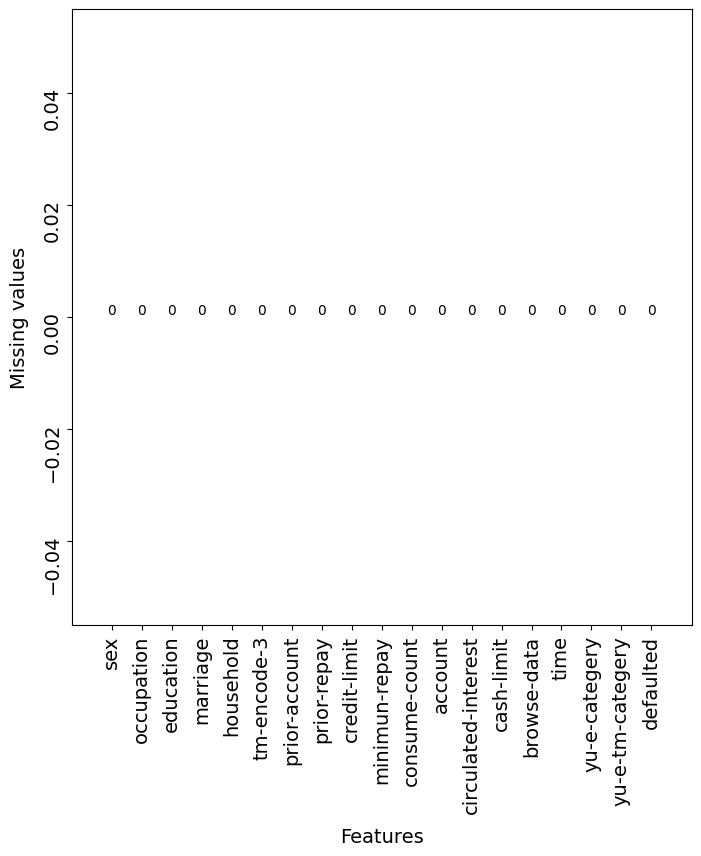

In [16]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(8,8),
                   rotated_ticks=True, save_path=ppdai_prep_dataset_path + 'missing_values-2.pdf')

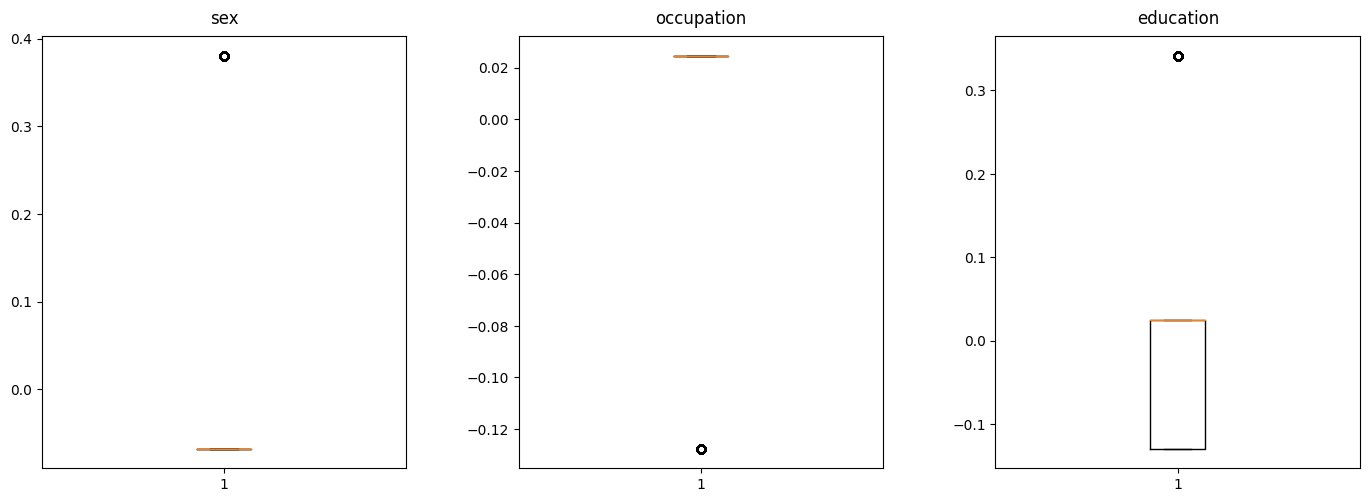

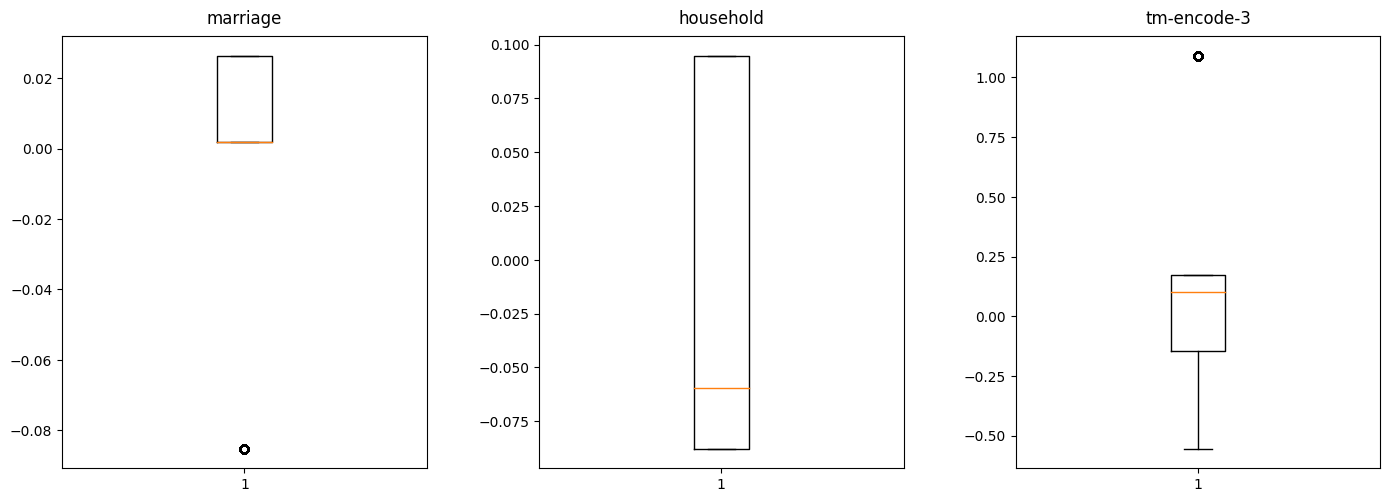

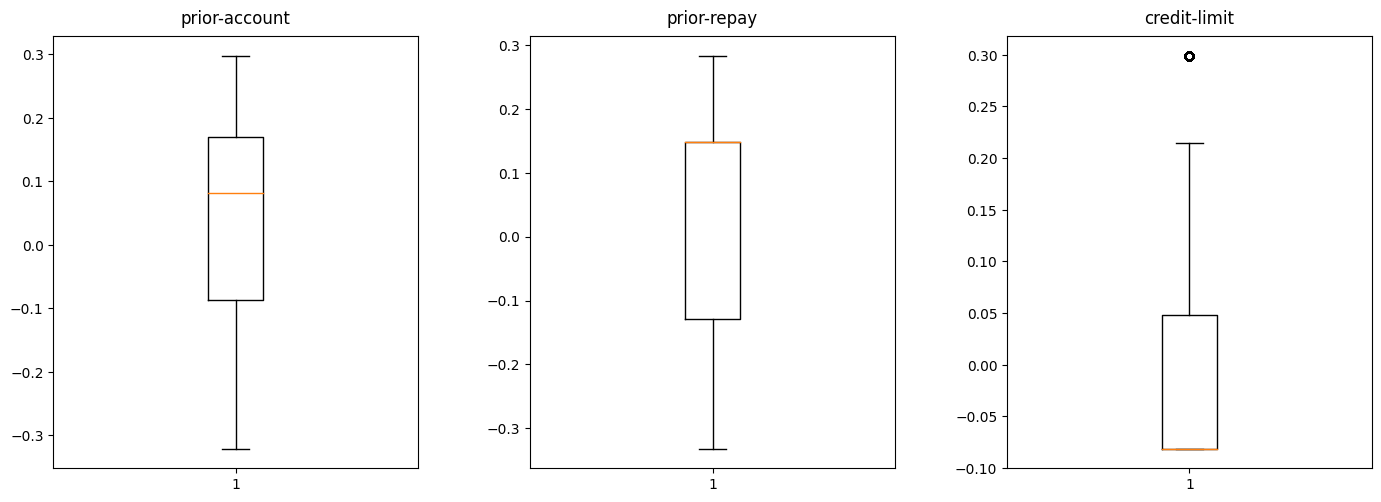

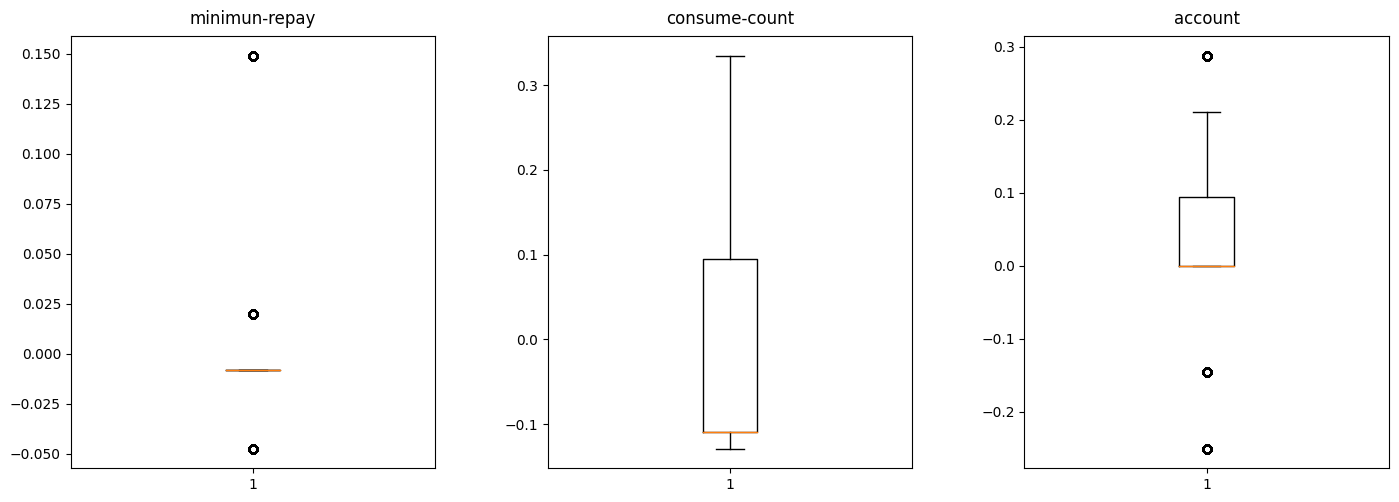

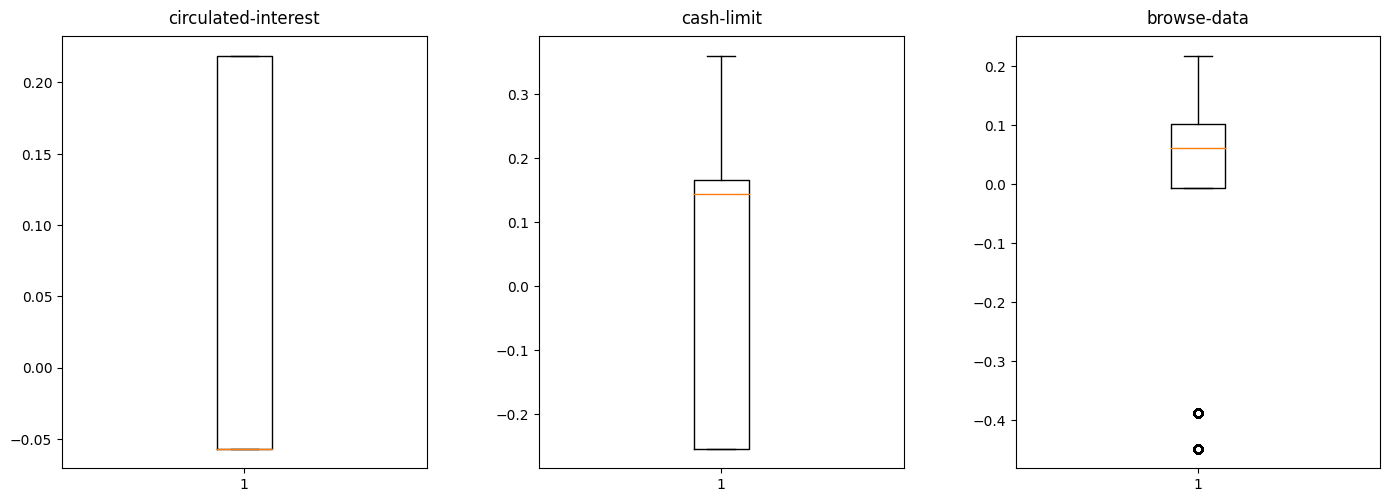

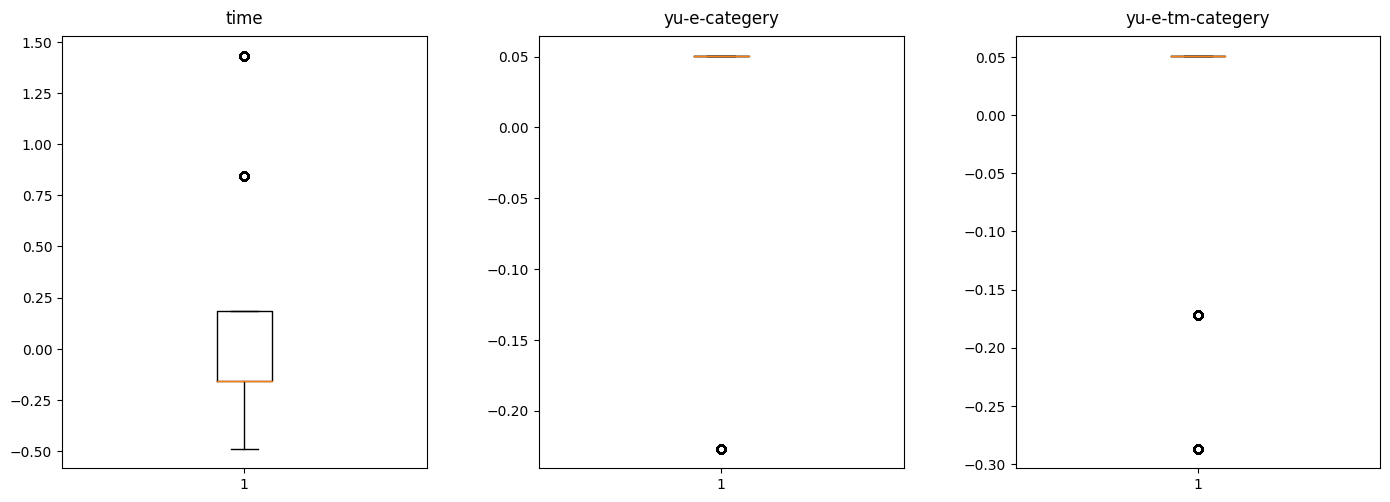

In [17]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=ppdai_prep_dataset_path)

In [18]:
#plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=ppdai_prep_dataset_path)

#### Plot samples count before and after Data cleaning.

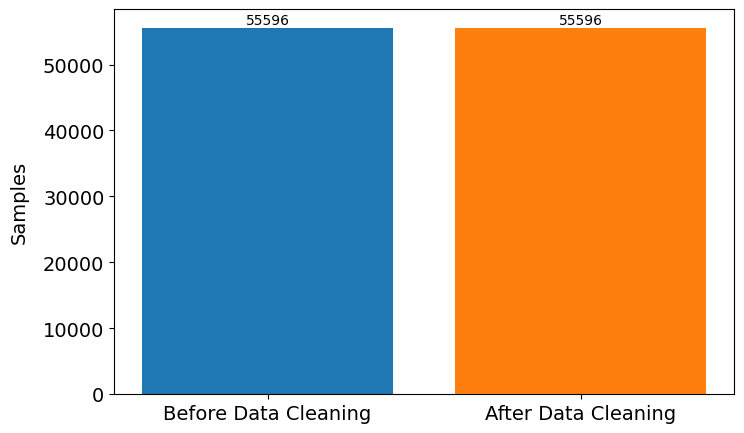

In [19]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=ppdai_prep_dataset_path + 'before_after.pdf')

#### Features IV scores

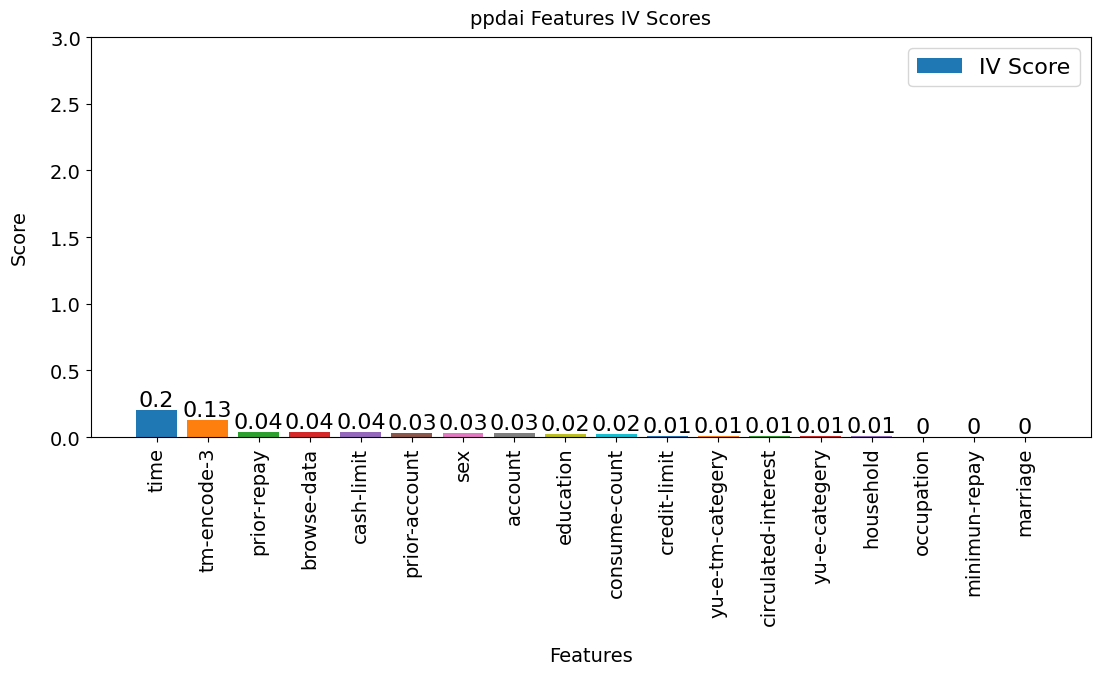

In [20]:
plotting.plot_features_scores(list(features_scores.keys()), list(features_scores.values()), 'ppdai Features IV Scores')

#### Features correlation

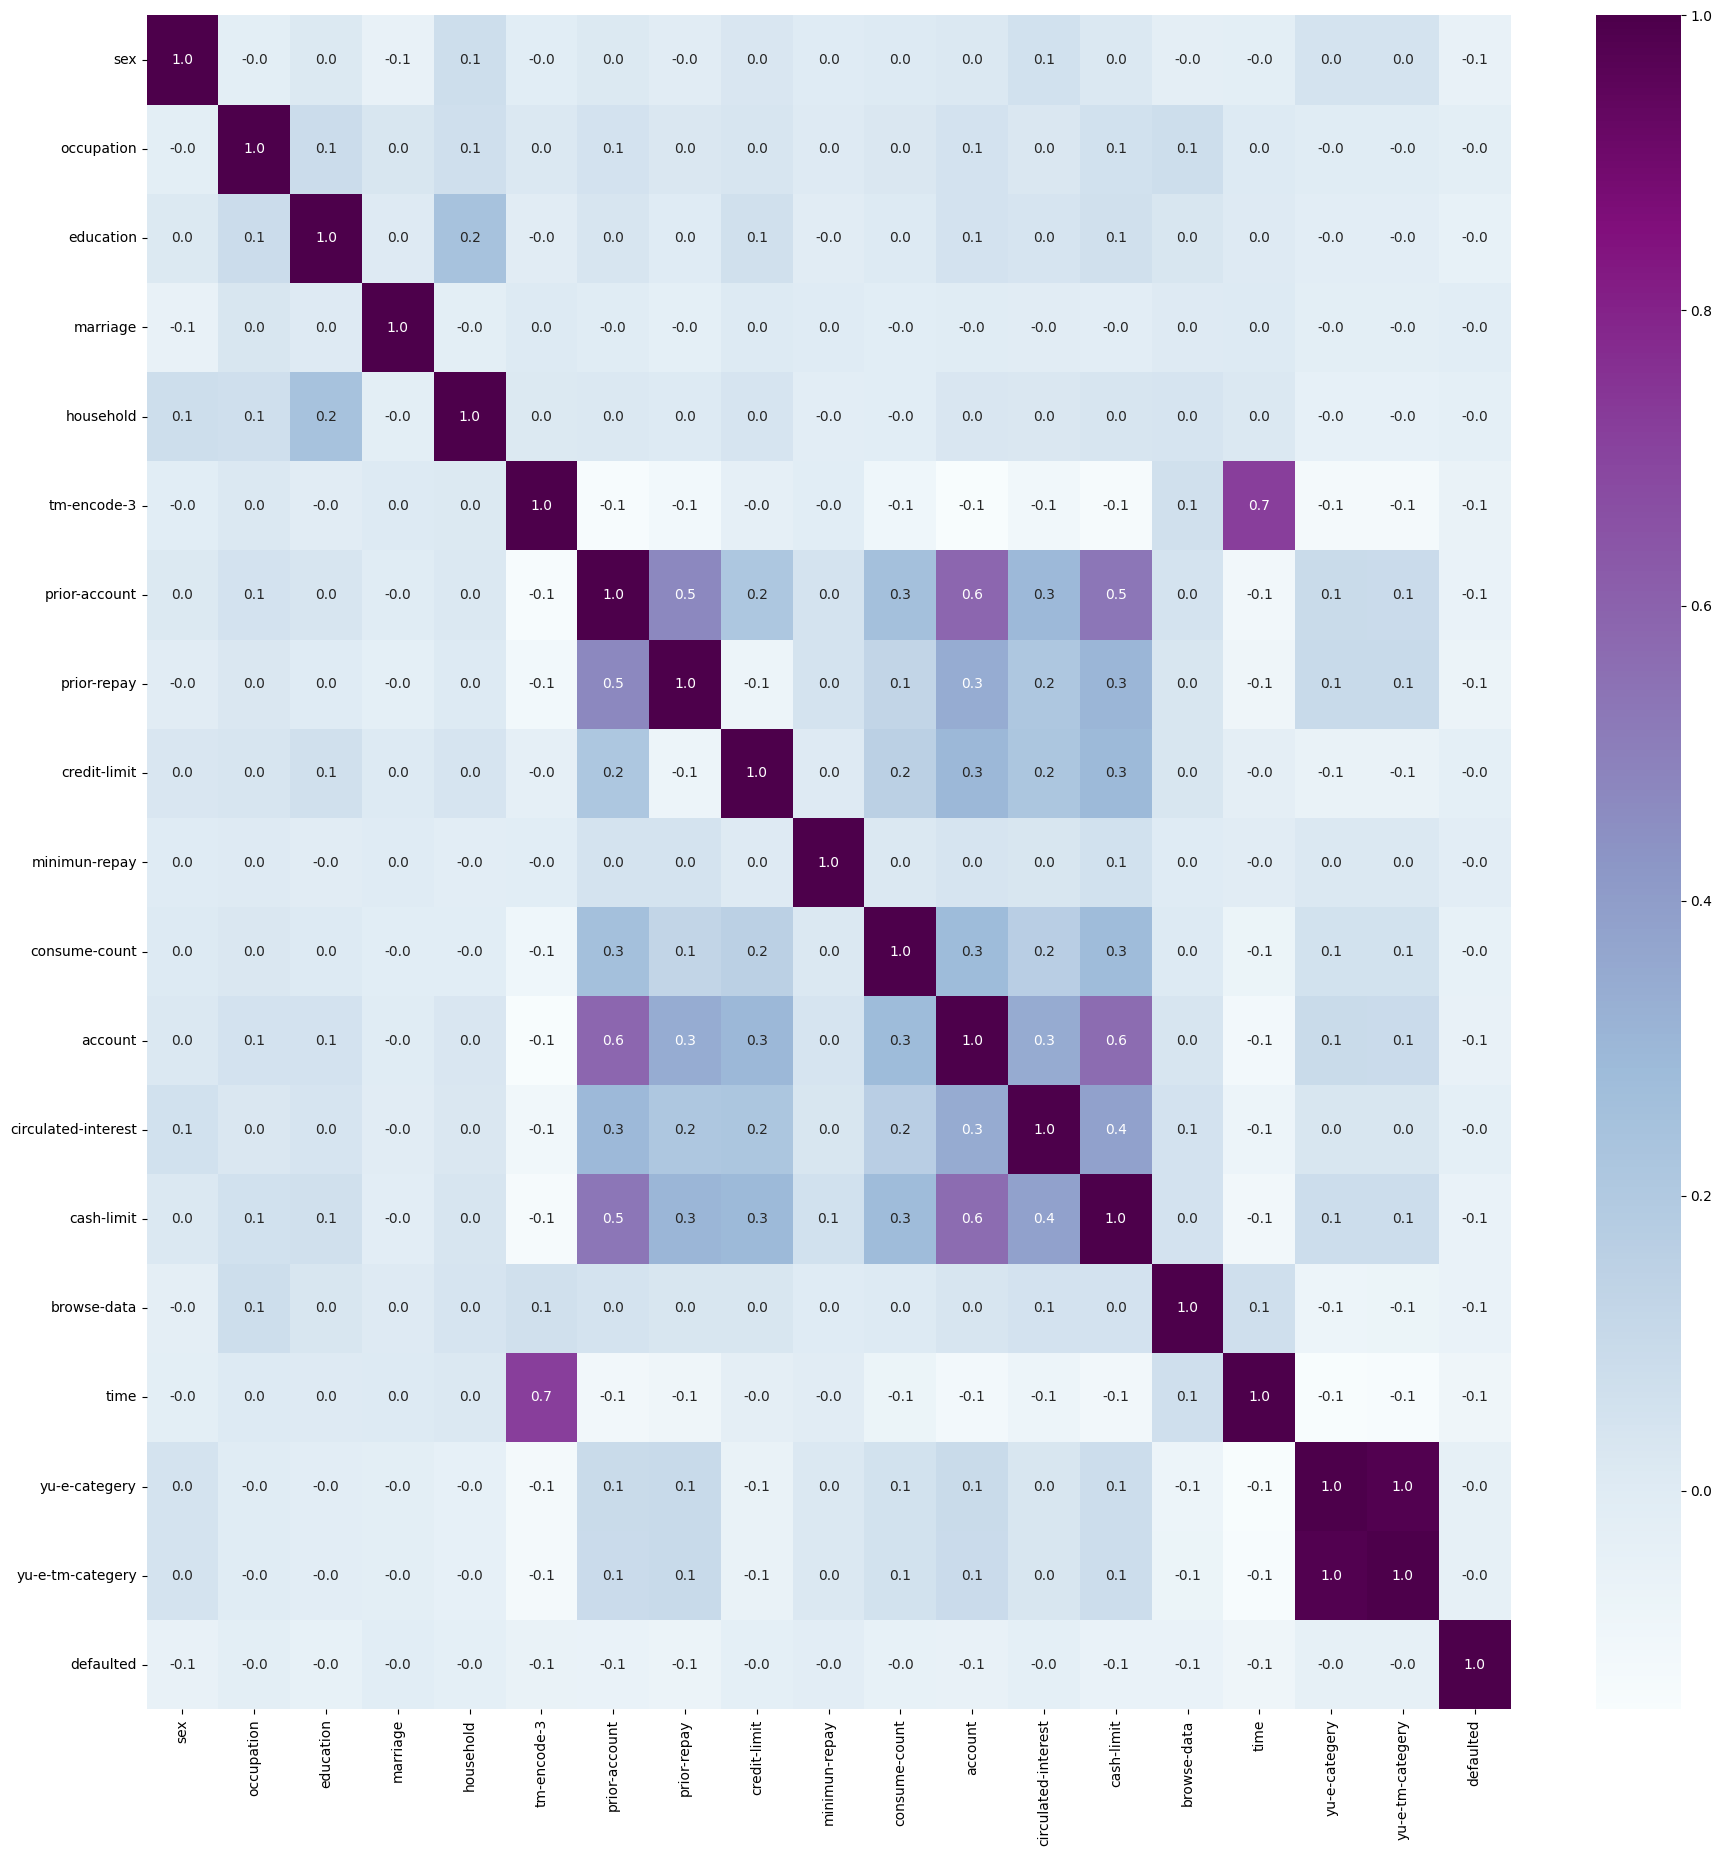

In [21]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(22, 22), save_path=ppdai_prep_dataset_path, dpi=100)

#### Drop redundant features using IV score.

In [22]:
data.drop(['yu-e-categery'], axis=1, inplace=True)

#### Save preprocessed dataset.

In [23]:
data

,sex,occupation,education,marriage,household,tm-encode-3,prior-account,prior-repay,credit-limit,minimun-repay,consume-count,account,circulated-interest,cash-limit,browse-data,time,yu-e-tm-categery,defaulted
0,-0.067719,0.024517,0.024040,0.026343,0.094712,0.173198,-0.320838,-0.332093,0.015567,-0.008373,-0.109586,-0.250675,-0.056738,-0.254015,0.101374,0.184679,-0.286807,False
1,-0.067719,0.024517,0.024040,-0.085255,0.094712,0.173198,0.297504,0.147988,0.048281,-0.008373,-0.128770,0.211191,-0.056738,0.144357,0.217452,0.184679,0.050805,False
2,-0.067719,-0.127574,-0.129615,0.026343,-0.059451,0.173198,-0.046936,0.283185,0.048281,-0.008373,-0.128770,-0.000582,-0.056738,-0.254015,0.060640,0.184679,-0.286807,False
3,-0.067719,-0.127574,-0.129615,0.001962,-0.087725,-0.145307,0.082360,-0.332093,0.214425,-0.008373,0.333966,0.094342,-0.056738,0.359069,0.060640,-0.383760,-0.286807,True
4,-0.067719,0.024517,0.341148,0.001962,0.094712,0.173198,-0.087270,0.283185,-0.081138,0.148778,-0.109586,-0.000582,-0.056738,-0.054921,0.101374,0.184679,0.050805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,-0.067719,0.024517,0.024040,0.026343,-0.059451,1.089976,0.082360,-0.008310,0.091099,0.020049,-0.109586,0.287250,0.218527,0.165638,0.076775,1.430408,0.050805,False
55592,-0.067719,-0.127574,0.341148,0.026343,-0.059451,-0.145307,0.082360,-0.072700,0.091099,-0.008373,-0.109586,0.094342,0.162153,0.144357,-0.005975,-0.156622,0.050805,True
55593,-0.067719,0.024517,-0.129615,0.026343,-0.059451,-0.145307,-0.087270,0.174262,-0.081138,-0.008373,0.094861,-0.000582,-0.056738,0.359069,0.217452,-0.156622,0.050805,False
55594,-0.067719,0.024517,0.024040,0.001962,-0.059451,0.173198,0.082360,-0.072700,0.015567,0.020049,0.117074,0.094342,0.162153,0.165638,0.217452,0.184679,0.050805,False


In [24]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55596 entries, 0 to 55595
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  55596 non-null  float64
 1   occupation           55596 non-null  float64
 2   education            55596 non-null  float64
 3   marriage             55596 non-null  float64
 4   household            55596 non-null  float64
 5   tm-encode-3          55596 non-null  float64
 6   prior-account        55596 non-null  float64
 7   prior-repay          55596 non-null  float64
 8   credit-limit         55596 non-null  float64
 9   minimun-repay        55596 non-null  float64
 10  consume-count        55596 non-null  float64
 11  account              55596 non-null  float64
 12  circulated-interest  55596 non-null  float64
 13  cash-limit           55596 non-null  float64
 14  browse-data          55596 non-null  float64
 15  time                 55596 non-null 

**EMP-$p_1$:**

In [25]:
len(data[data['defaulted'] == True])/len(data)

0.1291999424419023

**EMP-$p_0$:**

In [26]:
len(data[data['defaulted'] == False])/len(data)

0.8708000575580978

In [27]:
utilities.save_dataset(data=data, features_scores=features_scores, test_size=0.2,
                       save_path=ppdai_prep_dataset_path)

Train split size: 44476
Test split size: 11120
